(a) in pdf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


**(b) [1 mark] Read the data set in Data Q2.csv into a pandas dataframe.**

In [ ]:
data=pd.read_csv('Data_Q2.csv')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix


**(c) [1 mark] Perform standardization of each column in the data frame and create a new data
frame.**

In [ ]:
scalar=StandardScaler()
data_std=scalar.fit_transform(data)

In [ ]:
data_std=pd.DataFrame(data_std,columns=data.columns)

In [ ]:
data_std

Temperature  Humidity  Wind Speed      Flow  Consumption
0      -1.931878  1.404846   -0.641791 -0.664370    -3.450208
1       0.407654 -0.874474   -0.640417 -0.665724    -3.282442
2       0.459476 -0.888013   -0.640875 -0.665229    -3.255953
3       0.433565 -0.807575   -0.641333 -0.665412    -3.185315
4       0.393521 -0.610863   -0.641333 -0.664266    -3.167655
..           ...       ...         ...       ...          ...
995     0.836365 -2.637721    1.572655  0.152039     1.926266
996    -1.594563  0.082809    1.574029  1.046430     1.935127
997     0.242766  0.552690    1.570823 -0.665047     1.935127
998    -0.397944  0.162450   -0.645913 -0.666479     1.935127
999     0.683254 -0.831468   -0.643165  2.257439     1.935666

[1000 rows x 5 columns]

***(d) [1 marks] Split the data into two sets such that 80% of the data is considered as set T1 and
20% of the data is considered as set T2. Justify if the splits T1 and T2 have similar spread in
Consumption column***

In [ ]:
data_X=data_std[data.columns[:-1]]
data_Y=data_std[data.columns[-1]]
X_train,X_test,Y_train,Y_test=train_test_split(data_X,data_Y,test_size=0.2,random_state=58)


In [ ]:
print('number of training data :',len(X_train))
print('number of test data :',len(X_test))

number of training data : 800
number of test data : 200


In [ ]:
print('spread of consumption column in train data :',np.array(Y_train).max()-np.array(Y_train).min())
print('spread of Consumption column in test data :',np.array(Y_test).max()-np.array(Y_test).min())

spread of consumption column in train data : 5.385873933107962
spread of Consumption column in test data : 4.705442417542901


here we can see that test and train have similar sprad of consumption column.

***(e) [3 marks] Using T1 as training data, train kernel ridge regression model. Use RBF kernel and
tune the gamma parameter using 5-fold cross-validation.***

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import KFold

In [ ]:
# Define the range of hyperparameters to be optimized
parameter = { 'gamma': [0.001,0.01, 0.1, 1,10,100]}

# Define the number of folds for cross-validation
kf = KFold(n_splits=5)

# Perform grid search over the hyperparameters using cross-validation
krr = GridSearchCV(KernelRidge(kernel='rbf'), parameter, cv=kf )
krr.fit(X_train, Y_train)

# Print the optimal hyperparameters
print('Optimal hyperparameters:', krr.best_params_)

best_gamma=krr.best_params_['gamma']

final_krr=KernelRidge(kernel='rbf',gamma=best_gamma)
final_krr.fit(X_train,Y_train)

y_pred=final_krr.predict(X_test)

print(mean_squared_error(Y_test,y_pred))




Optimal hyperparameters: {'gamma': 10}
0.6778183103217615


***(f) [2 marks] Compute and display the RMSE and R2 values on the training set T1 and test set
T2.***

In [ ]:
# RMSE and R2 values
print('For T1 data set')
y_predict=final_krr.predict(X_train)
print('RMSE Value for T1 data is:',(mean_squared_error(Y_train,y_predict,squared=False)))
print('R2 value for T1 data  is :',r2_score(Y_train,y_predict))
print('For T1 data set:')
y_predict=final_krr.predict(X_test)
print('RMSE Value for T2 data is:',(mean_squared_error(Y_test,y_predict,squared=False)))
print('R2 value for T2 data  is :',r2_score(Y_test,y_predict))



For T1 data set
RMSE Value for T1 data is: 0.6486639627405709
R2 value for T1 data  is : 0.5994953676730239
For T1 data set:
RMSE Value for T2 data is: 0.8232972187015826
R2 value for T2 data  is : 0.1500269942759107


(g) [2 marks] Consider the original data in Data Q2.csv and load it into a different pandas dataframe
called frame2. Add another column with name Class to the data frame frame2 such that the
following hold:
 samples having Consumption values ≤ 6500 are labeled as class 1

In [ ]:
dataframe2=pd.read_csv('Data_Q2.csv')
dataframe2

Temperature  Humidity  Wind Speed     Flow  Consumption
0          5.578     93.00       0.082    0.185  5935.174070
1         15.510     64.38       0.085    0.133  6044.657863
2         15.730     64.21       0.084    0.152  6061.944778
3         15.620     65.22       0.083    0.145  6108.043217
4         15.450     67.69       0.083    0.189  6119.567827
..           ...       ...         ...      ...          ...
995       17.330     42.24       4.917   31.540  9443.855422
996        7.010     76.40       4.920   65.890  9449.638554
997       14.810     82.30       4.913    0.159  9449.638554
998       12.090     77.40       0.073    0.104  9449.638554
999       16.680     64.92       0.079  112.400  9449.990000

[1000 rows x 5 columns]

In [ ]:
def cla(x):
  if x<=6500:
    return 1
  elif x>6500 and x<=7000:
    return 2
  elif x>7000 and x<=7500:
    return 3
  elif x>7500 and x<=8000:
    return 4
  elif x>8000 and x<=8500:
    return 5
  elif x>8500 and x<=9000:
    return 6
  else:
    return 7      


In [ ]:
dataframe2['class']=dataframe2['Consumption'].apply(cla)

In [ ]:
dataframe2

Temperature  Humidity  Wind Speed     Flow  Consumption  class
0          5.578     93.00       0.082    0.185  5935.174070      1
1         15.510     64.38       0.085    0.133  6044.657863      1
2         15.730     64.21       0.084    0.152  6061.944778      1
3         15.620     65.22       0.083    0.145  6108.043217      1
4         15.450     67.69       0.083    0.189  6119.567827      1
..           ...       ...         ...      ...          ...    ...
995       17.330     42.24       4.917   31.540  9443.855422      7
996        7.010     76.40       4.920   65.890  9449.638554      7
997       14.810     82.30       4.913    0.159  9449.638554      7
998       12.090     77.40       0.073    0.104  9449.638554      7
999       16.680     64.92       0.079  112.400  9449.990000      7

[1000 rows x 6 columns]

***(h) [2 marks] Perform standardization of samples in frame2 belonging to each class separately.
Ignore Class column during standardization procedure.***

In [ ]:

data_std=pd.DataFrame()
for i in range(1,8):
  label_data=dataframe2[dataframe2['class']==i]
  data_X=label_data[label_data.columns[:-1]]
  scaler=StandardScaler()
  data_X=scaler.fit_transform(data_X)
  df=pd.DataFrame(data_X,columns=data.columns)
  data_std=pd.concat([data_std,df])
data_std=data_std.reset_index(drop=True)
data_std['class']=dataframe2['class']  
  



In [ ]:
data_std

Temperature  Humidity  Wind Speed      Flow  Consumption  class
0      -1.690575  1.563325   -0.508727 -0.365626    -1.925782      1
1       1.083295 -1.525195    0.581402 -0.412271    -1.304210      1
2       1.144738 -1.543541    0.218026 -0.395227    -1.206067      1
3       1.114017 -1.434547   -0.145350 -0.401507    -0.944353      1
4       1.066538 -1.167998   -0.145350 -0.362038    -0.878924      1
..           ...       ...         ...       ...          ...    ...
995     0.572096 -2.357184    1.585485 -0.112966     1.711956      7
996    -1.984162  0.416500    1.586861  0.552813     1.753338      7
997    -0.052107  0.895561    1.583650 -0.721200     1.753338      7
998    -0.725849  0.497697   -0.636763 -0.722266     1.753338      7
999     0.411091 -0.515640   -0.634011  1.454281     1.755853      7

[1000 rows x 6 columns]

(i) [4 marks] Split frame2 into train and test splits T3 and T4, such that the samples in T3 are
the same as in T1. Consider T3 as training set, ignore the Consumption column and considering
Class as labels, train a kernel SVM model with RBF kernel. Tune gamma parameter using 5
fold cross-validation. Take care of class imbalance issues if they exist.

In [ ]:
data_std_X=data_std[data_std.columns[:-1]]
data_std_Y=data_std[data_std.columns[-1]]
X_train,X_test,Y_train,Y_test=train_test_split(data_std_X,data_std_Y,test_size=0.2,random_state=58)

In [ ]:
T3_data=pd.concat([X_train,Y_train],axis=1)
T4_data=pd.concat([X_test,Y_test],axis=1)

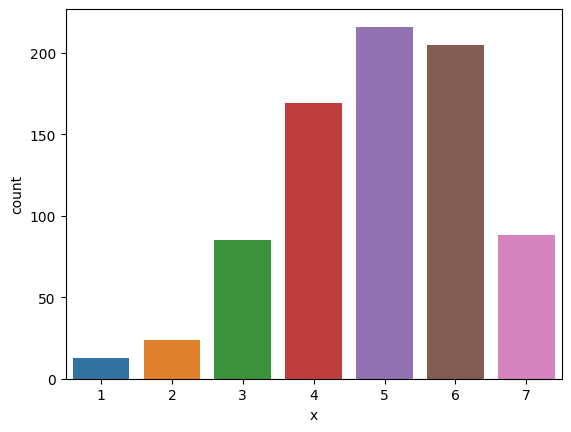

In [ ]:
dataframe=pd.DataFrame(np.array(T3_data['class']),columns=['x'])
plot=sns.countplot(x='x',data=dataframe)

**here imbalance occure,so we have to overcome this by oversampling.**

In [ ]:
from imblearn.over_sampling import RandomOverSampler
random_over_sample = RandomOverSampler(random_state=0)

X_resampled, y_resampled = random_over_sample.fit_resample(X_train, Y_train)

In [ ]:
#  update  T3 data by oversampling
T3_data_update=pd.concat([X_resampled,y_resampled],axis=1).reset_index(drop=True)


In [ ]:
T3_data_update

Temperature  Humidity  Wind Speed      Flow  Consumption  class
0       -0.720200 -0.469197   -0.753263 -0.727972    -0.079981      5
1        1.328418  0.614232    1.334580 -0.693452    -0.421568      5
2       -0.549091  0.166729   -0.750669  0.061859    -1.265145      5
3        0.964902  0.799181    1.502824 -0.728000    -0.695724      4
4       -1.854256  1.327617   -0.674883 -0.728825    -0.551773      4
...           ...       ...         ...       ...          ...    ...
1507    -0.183387  0.205388   -0.634928 -0.720464    -1.376534      7
1508    -0.720895  0.887442   -0.631258 -0.721258     0.149106      7
1509     0.520079  1.488298    1.589155 -0.721917     1.200649      7
1510     0.725669 -0.556238   -0.631717  0.321196    -1.459001      7
1511    -1.520964 -0.436067    1.585485 -0.723139    -1.308971      7

[1512 rows x 6 columns]

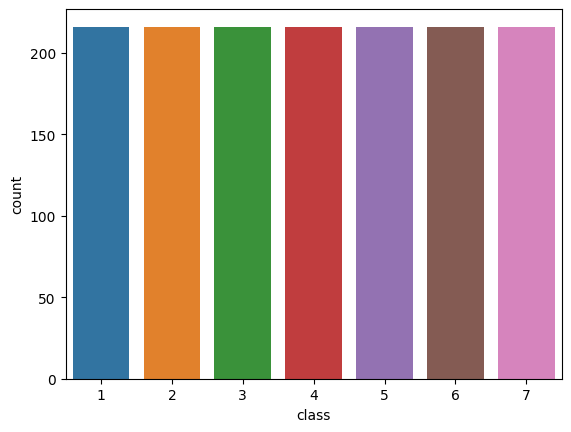

In [ ]:
plot=sns.countplot(x='class',data=T3_data_update)

**so impbalance problem is solved using oversampling.**

In [ ]:
X_train=T3_data_update[T3_data_update.columns[:-2]].reset_index(drop=True)
Y_train=T3_data_update[T3_data_update.columns[-1]].reset_index(drop=True)
X_test=T4_data[T4_data.columns[:-2]].reset_index(drop=True)
Y_test=T4_data[T4_data.columns[-1]].reset_index(drop=True)


In [ ]:
X_test

Temperature  Humidity  Wind Speed      Flow
0       0.747117 -1.519653   -0.753696 -0.025814
1       1.101054 -1.231523   -0.751102 -0.729820
2       1.820649 -2.354993    1.338904 -0.729920
3      -0.640282 -0.737551   -0.595070 -0.763234
4       1.139367 -0.173447   -0.677586 -0.727700
..           ...       ...         ...       ...
195     0.450280  0.941055   -0.599325 -0.763396
196     1.211160  1.407102   -0.640433 -0.721627
197     0.407243  0.763400    1.335445 -0.728247
198    -1.957192  0.989360   -0.595070 -0.761777
199    -1.466470  1.090434   -0.631717 -0.721840

[200 rows x 4 columns]

In [ ]:
T3_data

Temperature  Humidity  Wind Speed      Flow  Consumption  class
495    -0.720200 -0.469197   -0.753263 -0.727972    -0.079981      5
464     1.328418  0.614232    1.334580 -0.693452    -0.421568      5
402    -0.549091  0.166729   -0.750669  0.061859    -1.265145      5
207     0.964902  0.799181    1.502824 -0.728000    -0.695724      4
218    -1.854256  1.327617   -0.674883 -0.728825    -0.551773      4
..           ...       ...         ...       ...          ...    ...
910     0.520079 -0.669914   -0.633093 -0.722131    -1.294067      7
25      0.015459 -0.310878   -0.352401 -0.359922    -0.498820      2
791     0.070954 -0.234372   -0.596961 -0.762795     0.070522      6
544     0.477562 -0.857819   -0.756290  0.270926     0.512600      5
803    -2.135874  1.118174   -0.593652 -0.762448     0.171567      6

[800 rows x 6 columns]

In [ ]:
T3_data=T3_data.reset_index(drop=True)
T3_data.head()

Temperature  Humidity  Wind Speed      Flow  Consumption  class
0    -0.720200 -0.469197   -0.753263 -0.727972    -0.079981      5
1     1.328418  0.614232    1.334580 -0.693452    -0.421568      5
2    -0.549091  0.166729   -0.750669  0.061859    -1.265145      5
3     0.964902  0.799181    1.502824 -0.728000    -0.695724      4
4    -1.854256  1.327617   -0.674883 -0.728825    -0.551773      4

In [ ]:
grid_parameter = { 'gamma': [0.001, 0.01, 0.1, 1,10,100,1000]}
# Use cross-validation on the training set to evaluate the performance of the logistic regression model for each value of C
kernel_support_vector_machine = SVC(kernel='rbf')
grid_search = GridSearchCV(kernel_support_vector_machine, grid_parameter,  cv=5)
grid_search.fit(X_train, Y_train)

# Select the optimal value of C based on the performance of the model on the validation set

best_gamma=grid_search.best_params_['gamma']
print(f"Best_gamma:{best_gamma}")

# Train the final logistic regression model using the selected value of C and the entire training set
final_kernel_support_vector_machine = SVC(kernel='rbf',gamma=best_gamma)
final_kernel_support_vector_machine.fit(X_train, Y_train)

#for T3 data set
y_pred_T3=final_kernel_support_vector_machine.predict(T3_data[T3_data.columns[:-2]])
print(y_pred_T3)


# Evaluate the performance of the final model on the test set to estimate its performance on unseen data
y_pred_T4 = final_kernel_support_vector_machine.predict(X_test)
print('for T4 ',y_pred_T4)

Best_gamma:100
[5 5 5 4 4 6 6 6 3 7 4 6 5 7 6 6 4 4 4 5 4 3 5 4 4 5 4 4 5 3 5 6 5 4 5 7 7
 3 4 6 4 5 3 2 6 3 6 7 5 3 6 4 7 4 5 4 3 7 6 6 5 6 6 4 7 5 4 4 6 6 6 3 2 4
 5 5 4 6 3 4 6 5 7 3 4 4 7 5 5 7 5 5 5 5 1 5 3 5 5 5 5 4 4 4 3 7 1 6 6 5 3
 6 5 7 6 5 3 4 3 4 5 4 4 6 6 3 7 4 7 6 4 5 6 4 4 6 6 7 6 5 6 6 7 7 7 1 6 3
 2 4 4 6 2 6 6 4 5 6 4 5 6 5 1 6 6 6 4 3 7 5 3 3 5 5 6 6 6 4 5 5 3 4 4 1 7
 3 2 5 5 4 5 4 6 6 3 4 3 6 6 7 6 7 3 7 5 4 4 7 5 5 7 5 4 4 2 5 6 4 4 5 5 6
 4 6 5 6 3 5 4 4 6 5 4 4 5 3 1 4 6 5 3 3 7 6 6 6 5 4 5 3 6 6 4 4 6 4 3 6 5
 6 5 3 5 5 4 6 4 4 7 4 5 5 4 5 6 3 3 4 6 6 5 5 5 5 3 5 7 5 7 6 5 4 6 5 6 5
 5 3 6 3 6 3 4 3 6 6 5 6 5 7 4 5 6 5 6 4 5 3 4 5 6 6 2 6 7 6 7 6 6 6 4 6 7
 6 5 3 7 5 6 2 4 4 2 5 5 5 3 3 5 6 4 3 4 6 7 5 4 5 4 5 6 4 2 4 4 5 5 6 7 3
 6 5 3 3 7 6 7 5 4 6 6 6 3 5 1 7 3 5 5 4 4 7 4 4 5 5 4 5 6 6 4 6 4 5 3 5 7
 5 5 6 6 5 5 7 6 6 6 6 5 5 4 2 4 7 4 4 7 7 6 7 1 6 3 3 5 3 5 3 5 4 5 5 7 5
 5 3 4 5 7 4 7 6 6 4 1 6 4 6 5 4 3 5 6 6 4 4 6 2 4 6 5 4 6 7 6 6 4 4 5 6 6
 5 5 7 5 5

(j) [5 marks] Now consider samples belonging to a particular class i in T3: build a kernel ridge
regression model with RBF kernel (ignore the Class column for this task). Tune gamma parameter
using 5 fold cross-validation restricted to samples belonging to only class i. Repeat this
for each class. Thus, at the end, for each class i, you would now have a kernel ridge regression
model Mi.

In [ ]:
ridge_reg_models={}
for i in range(1,8):
  # for state i
  data_sample=T3_data[T3_data['class']==i]
  data_sample_X=data_sample[data_sample.columns[:-2]]
  data_sample_Y=data_sample[data_sample.columns[-2]]

  # fitting into ridge regression 
  # Define the range of hyperparameters to be optimized
  parameter = { 'gamma': [0.001,0.01, 0.1, 1,10,100]}

  # Define the number of folds for cross-validation
  kf = KFold(n_splits=5)

  # Perform grid search over the hyperparameters using cross-validation
  krr = GridSearchCV(KernelRidge(kernel='rbf'), parameter, cv=kf )
  krr.fit(data_sample_X, data_sample_Y)

  # Print the optimal hyperparameters
  print('Optimal hyperparameters:', krr.best_params_)

  best_gamma=krr.best_params_['gamma']

  final_krr=KernelRidge(kernel='rbf',gamma=best_gamma)
  final_krr.fit(data_sample_X, data_sample_Y)
  ridge_reg_models[f'M{i}']=final_krr
  
  



Optimal hyperparameters: {'gamma': 1}
Optimal hyperparameters: {'gamma': 10}
Optimal hyperparameters: {'gamma': 0.01}
Optimal hyperparameters: {'gamma': 0.1}
Optimal hyperparameters: {'gamma': 100}
Optimal hyperparameters: {'gamma': 10}
Optimal hyperparameters: {'gamma': 10}


In [ ]:
ridge_reg_models

{'M1': KernelRidge(gamma=1, kernel='rbf'),
 'M2': KernelRidge(gamma=10, kernel='rbf'),
 'M3': KernelRidge(gamma=0.01, kernel='rbf'),
 'M4': KernelRidge(gamma=0.1, kernel='rbf'),
 'M5': KernelRidge(gamma=100, kernel='rbf'),
 'M6': KernelRidge(gamma=10, kernel='rbf'),
 'M7': KernelRidge(gamma=10, kernel='rbf')}

(k) [5 marks] For testing (or) inference, implement the following procedure: for any sample, first
predict the class label as j and then based on the class label j, use model Mj to predict the
Consumption value. Using this procedure, find the RMSE values for T3 and T4.

In [ ]:
T4_data.head()

Temperature  Humidity  Wind Speed      Flow  Consumption  class
595     0.747117 -1.519653   -0.753696 -0.025814     1.195140      5
604     1.101054 -1.231523   -0.751102 -0.729820     1.282872      5
570     1.820649 -2.354993    1.338904 -0.729920     0.869207      5
826    -0.640282 -0.737551   -0.595070 -0.763234     0.373656      6
277     1.139367 -0.173447   -0.677586 -0.727700     0.482637      4

In [ ]:
# T3
consumption_pred_T3=[]
for i in range(len(y_pred_T3)):
  pred=ridge_reg_models[f'M{y_pred_T3[i]}'].predict(T3_data[T3_data.columns[:-2]])
  consumption_pred_T3.append(pred[i])


In [ ]:
# T4 data which is test data 
consumption_pred_T4=[]
for i in range(len(y_pred_T4)):
  pred=ridge_reg_models[f'M{y_pred_T4[i]}'].predict(X_test)
  consumption_pred_T4.append(pred[i])


In [ ]:
print('RMSE value for T3 data:',mean_squared_error(T3_data['Consumption'],consumption_pred_T3,squared=False))
print('RMSE Value for T4 data :',mean_squared_error(T4_data['Consumption'],consumption_pred_T4,squared=False))


RMSE value for T3 data: 0.6977650672517883
RMSE Value for T4 data : 1.0260597888371215


(l) [4 marks] Compare and contrast the RMSE values obtained in part (f) and part (k). Using
your observations, suggest when the two-stage approach of classification-followed-by-regression
would be useful when compared to the simple regression approach on the full data set.

In [ ]:
print('Simple Regression approach')
print('RMSE value for T1 data:',0.95488269244772)
print('RMSE value for T2 data:',0.9934194399030392)
print('Two stage approach ')
print('RMSE value for T3 data:',0.6977650672517883)
print('RMSE value for T4 data:',1.0260597888371215)

Simple Regression approach
RMSE value for T1 data: 0.95488269244772
RMSE value for T2 data: 0.9934194399030392
Two stage approach 
RMSE value for T3 data: 0.6977650672517883
RMSE value for T4 data: 1.0260597888371215


**here we can see that the rmse of simple regression approach is lower for test data than the two stage approach. so simple regreesion approach is better than the two stage approach.**